In [101]:
import pandas as pd
import xgboost as xgb

In [103]:
df = pd.read_csv("2018_all_indicators.csv")

In [104]:
df = df[['dimension','indicator_name','iso3','country_name','2017']]

In [105]:
df.shape

(25636, 5)

In [106]:
df = df.dropna()

In [107]:
df.shape

(12728, 5)

In [108]:
df.iso3.unique().shape

(195,)

In [109]:
country_codes = list(df.iso3.unique())

In [110]:
country_codes

['AFG',
 'ALB',
 'DZA',
 'AND',
 'AGO',
 'ATG',
 'ARG',
 'ARM',
 'AUS',
 'AUT',
 'AZE',
 'BHS',
 'BHR',
 'BGD',
 'BRB',
 'BLR',
 'BEL',
 'BLZ',
 'BEN',
 'BTN',
 'BOL',
 'BIH',
 'BWA',
 'BRA',
 'BRN',
 'BGR',
 'BFA',
 'BDI',
 'CPV',
 'KHM',
 'CMR',
 'CAN',
 'CAF',
 'TCD',
 'CHL',
 'CHN',
 'COL',
 'COM',
 'COG',
 'COD',
 'CRI',
 'CIV',
 'HRV',
 'CUB',
 'CYP',
 'CZE',
 'DNK',
 'DJI',
 'DMA',
 'DOM',
 'ECU',
 'EGY',
 'SLV',
 'GNQ',
 'ERI',
 'EST',
 'SWZ',
 'ETH',
 'FJI',
 'FIN',
 'FRA',
 'GAB',
 'GMB',
 'GEO',
 'DEU',
 'GHA',
 'GRC',
 'GRD',
 'GTM',
 'GIN',
 'GNB',
 'GUY',
 'HTI',
 'HND',
 'HKG',
 'HUN',
 'ISL',
 'IND',
 'IDN',
 'IRN',
 'IRQ',
 'IRL',
 'ISR',
 'ITA',
 'JAM',
 'JPN',
 'JOR',
 'KAZ',
 'KEN',
 'KIR',
 'KOR',
 'KWT',
 'KGZ',
 'LAO',
 'LVA',
 'LBN',
 'LSO',
 'LBR',
 'LBY',
 'LIE',
 'LTU',
 'LUX',
 'MDG',
 'MWI',
 'MYS',
 'MDV',
 'MLI',
 'MLT',
 'MHL',
 'MRT',
 'MUS',
 'MEX',
 'FSM',
 'MDA',
 'MNG',
 'MNE',
 'MAR',
 'MOZ',
 'MMR',
 'NAM',
 'NPL',
 'NLD',
 'NZL',
 'NIC',
 'NER',


In [111]:
df['indicator_name'].unique()

array(['HDI rank', 'Human Development Index (HDI)',
       'Old-age (65 and older) dependency ratio (per 100 people ages 15-64)',
       'Population ages 15–64 (millions)',
       'Population ages 65 and older (millions)',
       'Population under age 5 (millions)',
       'Sex ratio at birth (male to female births)',
       'Total population (millions)', 'Urban population (%)',
       'Young age (0-14) dependency ratio (per 100 people ages 15-64)',
       'Education index', 'Expected years of schooling (years)',
       'Expected years of schooling, female (years)',
       'Expected years of schooling, male (years)',
       'Government expenditure on education (% of GDP)',
       'Gross enrolment ratio, pre-primary (% of preschool-age children)',
       'Gross enrolment ratio, primary (% of primary school-age population)',
       'Gross enrolment ratio, secondary (% of secondary school-age population)',
       'Gross enrolment ratio, tertiary (% of tertiary school-age population)',
   

In [112]:
df['dimension'].unique()

array(['Composite indices', 'Demography', 'Education',
       'Environmental sustainability', 'Gender', 'Health',
       'Human Security', 'Income/composition of resources', 'Inequality',
       'Mobility and communication', 'Poverty',
       'Socio-economic sustainability', 'Trade and financial flows',
       'Work, employment and vulnerability'], dtype=object)

In [113]:
def indicators_in_dimension(dimension):
    return list(df[df['dimension']==dimension]['indicator_name'].unique())

In [114]:
indicators_in_dimension("Health")

['Infants lacking immunization, DPT (% of one-year-olds)',
 'Infants lacking immunization, measles (% of one-year-olds)',
 'Life expectancy at birth (years)',
 'Life expectancy at birth, female (years)',
 'Life expectancy at birth, male (years)',
 'Life expectancy index']

In [115]:
def indicators_in_dimension(indicator):
    indicator_data = df[df['indicator_name']==indicator]
    zipped_values = zip(list(indicator_data['iso3']),list(indicator_data['2017']))
    return {k:{indicator : v} for k,v in zipped_values}

In [116]:
life_expec = 'Life expectancy at birth (years)'
indic = indicators_in_dimension(life_expec)

In [117]:
for k, v in indic.items():
    print(k,v)

AFG {'Life expectancy at birth (years)': 64.0}
ALB {'Life expectancy at birth (years)': 78.5}
DZA {'Life expectancy at birth (years)': 76.3}
AND {'Life expectancy at birth (years)': 81.7}
AGO {'Life expectancy at birth (years)': 61.8}
ATG {'Life expectancy at birth (years)': 76.5}
ARG {'Life expectancy at birth (years)': 76.7}
ARM {'Life expectancy at birth (years)': 74.8}
AUS {'Life expectancy at birth (years)': 83.1}
AUT {'Life expectancy at birth (years)': 81.8}
AZE {'Life expectancy at birth (years)': 72.1}
BHS {'Life expectancy at birth (years)': 75.8}
BHR {'Life expectancy at birth (years)': 77.0}
BGD {'Life expectancy at birth (years)': 72.8}
BRB {'Life expectancy at birth (years)': 76.1}
BLR {'Life expectancy at birth (years)': 73.1}
BEL {'Life expectancy at birth (years)': 81.3}
BLZ {'Life expectancy at birth (years)': 70.6}
BEN {'Life expectancy at birth (years)': 61.2}
BTN {'Life expectancy at birth (years)': 70.6}
BOL {'Life expectancy at birth (years)': 69.5}
BIH {'Life ex

In [118]:
def add_indicator_to(dictionary, indicator):
    indicator_data = df[df['indicator_name']==indicator]
    zipped_values = zip(list(indicator_data['iso3']), list(indicator_data['2017']))
    for k, v in zipped_values:
        try:
            dictionary[k][indicator] = v
        except:
            print("failed with key: "+k+" on "+indicator)

In [119]:
vaccination = 'Infants lacking immunization, measles (% of one-year-olds)'
add_indicator_to(indic, vaccination)

failed with key: MCO on Infants lacking immunization, measles (% of one-year-olds)
failed with key: NRU on Infants lacking immunization, measles (% of one-year-olds)
failed with key: SMR on Infants lacking immunization, measles (% of one-year-olds)
failed with key: TUV on Infants lacking immunization, measles (% of one-year-olds)


In [120]:
indicators = [
    'Share of seats in parliament (% held by women)',
    'Youth unemployment rate (female to male ratio)',
    'Expected years of schooling (years)',
       'Expected years of schooling, female (years)',
       'Expected years of schooling, male (years)',
    'Unemployment, total (% of labour force)',
       'Unemployment, youth (% ages 15–24)',
       'Vulnerable employment (% of total employment)',
]
for indicator in indicators:
    add_indicator_to(indic, indicator)


failed with key: MCO on Share of seats in parliament (% held by women)
failed with key: NRU on Share of seats in parliament (% held by women)
failed with key: SMR on Share of seats in parliament (% held by women)
failed with key: TUV on Share of seats in parliament (% held by women)
failed with key: NRU on Expected years of schooling (years)
failed with key: SMR on Expected years of schooling (years)
failed with key: NRU on Expected years of schooling, female (years)
failed with key: SMR on Expected years of schooling, female (years)
failed with key: NRU on Expected years of schooling, male (years)
failed with key: SMR on Expected years of schooling, male (years)


In [121]:
final_df = pd.DataFrame(indic).transpose()

In [122]:
final_df.count()

Expected years of schooling (years)                           190
Expected years of schooling, female (years)                   179
Expected years of schooling, male (years)                     179
Infants lacking immunization, measles (% of one-year-olds)    189
Life expectancy at birth (years)                              191
Share of seats in parliament (% held by women)                189
Unemployment, total (% of labour force)                       180
Unemployment, youth (% ages 15–24)                            180
Vulnerable employment (% of total employment)                 180
Youth unemployment rate (female to male ratio)                180
dtype: int64

In [124]:
final_df =final_df.dropna()

In [125]:
final_df.count()

Expected years of schooling (years)                           170
Expected years of schooling, female (years)                   170
Expected years of schooling, male (years)                     170
Infants lacking immunization, measles (% of one-year-olds)    170
Life expectancy at birth (years)                              170
Share of seats in parliament (% held by women)                170
Unemployment, total (% of labour force)                       170
Unemployment, youth (% ages 15–24)                            170
Vulnerable employment (% of total employment)                 170
Youth unemployment rate (female to male ratio)                170
dtype: int64

/home/lukpo/.local/lib/python3.6/site-packages/matplotlib/tight_layout.py:181: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  warnings.warn('Tight layout not applied. '


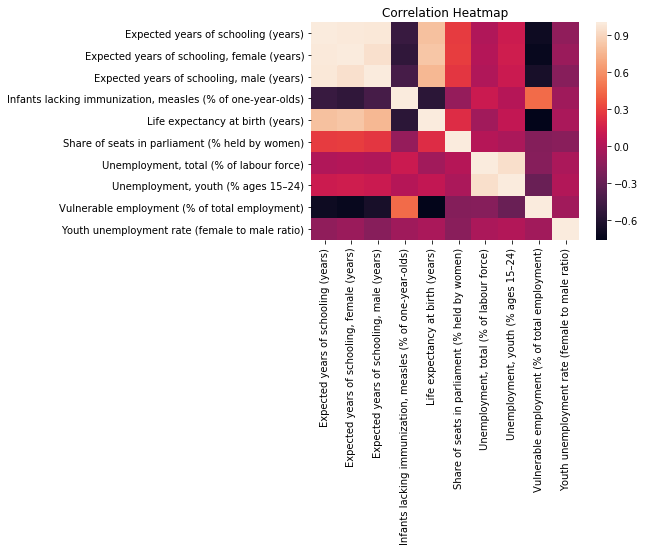

In [397]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
fig = sns.heatmap(final_df.corr())
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.savefig("correlation_heatmap", figsize=(96,72))

In [136]:
final_df.index

Index(['AFG', 'ALB', 'DZA', 'AGO', 'ARG', 'ARM', 'AUS', 'AUT', 'AZE', 'BHR',
       ...
       'GBR', 'USA', 'URY', 'UZB', 'VUT', 'VEN', 'VNM', 'YEM', 'ZMB', 'ZWE'],
      dtype='object', length=170)

In [143]:
final_df[life_expec].describe()

count    170.000000
mean      72.163529
std        7.697211
min       52.200000
25%       66.800000
50%       73.800000
75%       77.400000
max       83.900000
Name: Life expectancy at birth (years), dtype: float64

In [263]:
train_features = [feature for feature in list(final_df) if feature != life_expec]
train_df = final_df.iloc[:150][train_features]
train_label = final_df.iloc[:150][life_expec]
test_df = final_df.iloc[150:][train_features]
test_label = final_df.iloc[150:][life_expec]


In [306]:
import xgboost as xgb


dtrain = xgb.DMatrix(train_df, label=train_label)
dtest = xgb.DMatrix(test_df, label=test_label)
# specify parameters via map
param = {'max_depth':6,
         'eta':1,  #this is the default value anyway
         'colsample_bytree':1  #this is the default value anyway
        }

num_round = 15
initial_trees = xgb.train(param, dtrain, num_round)
# make prediction
first_preds = initial_trees.predict(dtest)

In [307]:
first_preds

array([68.66617 , 61.48115 , 74.0443  , 78.71511 , 78.14898 , 80.51852 ,
       72.17307 , 65.37586 , 75.38949 , 77.51605 , 82.26712 , 77.91969 ,
       71.2967  , 72.611015, 66.30306 , 75.065186, 77.31406 , 61.713524,
       70.75769 , 65.46725 ], dtype=float32)

In [323]:
import math 

def msesqrt(std, test_label, preds):
    squared_errors = [diff*diff for diff in (test_label - preds)]
    return math.sqrt(sum(squared_errors)/len(preds))

msesqrt(std, test_label, first_preds)

4.023551214123461

In [326]:
test_label - first_preds

TLS    0.533832
TGO   -0.981152
TON   -0.844296
TTO   -7.915111
TUN   -2.248979
TUR   -4.518517
TKM   -4.173073
UGA   -5.175862
UKR   -3.289488
ARE   -0.116052
GBR   -0.567120
USA    1.580307
URY    6.303300
UZB   -1.211015
VUT    5.996938
VEN   -0.365186
VNM   -0.814056
YEM    3.486476
ZMB   -8.457690
ZWE   -3.767247
Name: Life expectancy at birth (years), dtype: float64

In [384]:
param = {'max_depth':5,
         'eta':.1,  #this is the default value anyway
         'colsample_bytree':.75  #this is the default value anyway
        }
num_round = 40
new_tree = xgb.train(param, dtrain, num_round)
# make prediction
new_preds = new_tree.predict(dtest)

In [385]:
msesqrt(std, test_label, new_preds)

3.1542598764813596

In [386]:
test_label - new_preds

TLS   -0.854657
TGO   -3.954330
TON   -0.169690
TTO   -2.735004
TUN    0.132704
TUR   -0.790581
TKM   -0.779831
UGA   -3.915250
UKR   -2.329787
ARE    2.499434
GBR    1.294406
USA    2.790764
URY    3.438387
UZB    0.608466
VUT    7.423917
VEN   -0.666745
VNM    3.804672
YEM    0.537662
ZMB   -6.903094
ZWE   -2.687543
Name: Life expectancy at birth (years), dtype: float64

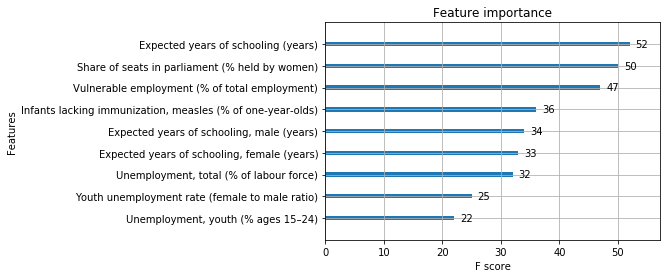

In [400]:
fig = xgb.plot_importance(new_tree)

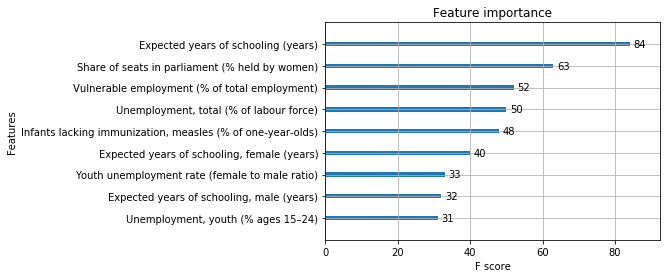

In [388]:
xgb.plot_importance(initial_trees)

In [389]:
agg_preds = (new_preds + first_preds)/2

In [390]:
agg_preds

array([69.36041 , 62.967743, 73.70699 , 76.12506 , 76.95814 , 78.65455 ,
       70.476456, 64.74556 , 74.90964 , 76.20831 , 81.33636 , 77.31447 ,
       72.72916 , 71.70128 , 65.58957 , 75.215965, 75.00469 , 63.18793 ,
       69.98039 , 64.9274  ], dtype=float32)

In [391]:
msesqrt(std, test_label, agg_preds)

3.3816703332355047